# Wine Variety Prediction

I have used NLP to predict the variety of the wine.

## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from scipy import stats
from sklearn.metrics import mean_squared_error

## Importing Dataset: 

In [2]:
df = pd.read_csv('train.csv')
df.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


## Analysing the reviews:

In [5]:
top = df[df.points >= 95]
top.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
25,@vossroger,France,Château Rauzan-Ségla 2009 Margaux,"A rich and opulent wine, very ripe, packed wit...",NaN,95,116.0,Bordeaux,Margaux,NaN,Château Rauzan-Ségla,Bordeaux-style Red Blend
181,@mattkettmann,US,Herman Story 2014 Nuts & Bolts Syrah (California),Black in the glass and dense with aromas of co...,Nuts & Bolts,95,47.0,California,California,California Other,Herman Story,Syrah
257,@vossroger,Austria,Franz Hirtzberger 2007 Hochrain Smaragd Riesli...,A Riesling that hovers deliciously between Als...,Hochrain Smaragd,95,74.0,Wachau,NaN,NaN,Franz Hirtzberger,Riesling
258,@vossroger,France,Taittinger 2012 Millésimé Brut (Champagne),Made from equal parts Pinot Noir and Chardonna...,Millésimé Brut,95,97.0,Champagne,Champagne,NaN,Taittinger,Champagne Blend
336,NaN,US,Merry Edwards 2008 Flax Vineyard Méthode a L'A...,Merry Edwards has figured out the magic trick ...,Flax Vineyard Méthode a L'Ancienne,96,54.0,California,Russian River Valley,Sonoma,Merry Edwards,Pinot Noir


In [6]:
bottom = df[df.points <= 85]
bottom.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
5,@wineschach,Argentina,Andean 2005 Finca La Escondida Reserva Caberne...,"Strident aromas of licorice, herbs, berries an...",Finca La Escondida Reserva,85,13.0,Other,San Juan,NaN,Andean,Cabernet Sauvignon
17,@wineschach,Chile,Echeverria 2014 Reserva Unwooded Chardonnay (C...,"Leesy aromas of tropical fruits, banana and ca...",Reserva Unwooded,85,9.0,Curicó Valley,NaN,NaN,Echeverria,Chardonnay
20,NaN,US,Rubberneck 2006 Cabernet Sauvignon (Paso Robles),"Robust and fleshy, this is soft, easy and slig...",NaN,83,11.0,California,Paso Robles,Central Coast,Rubberneck,Cabernet Sauvignon
22,NaN,US,Vision Cellars 2006 Las Alturas Vineyard Pinot...,"Too big by far for a Pinot Noir, this single-v...",Las Alturas Vineyard,84,48.0,California,Santa Lucia Highlands,Central Coast,Vision Cellars,Pinot Noir


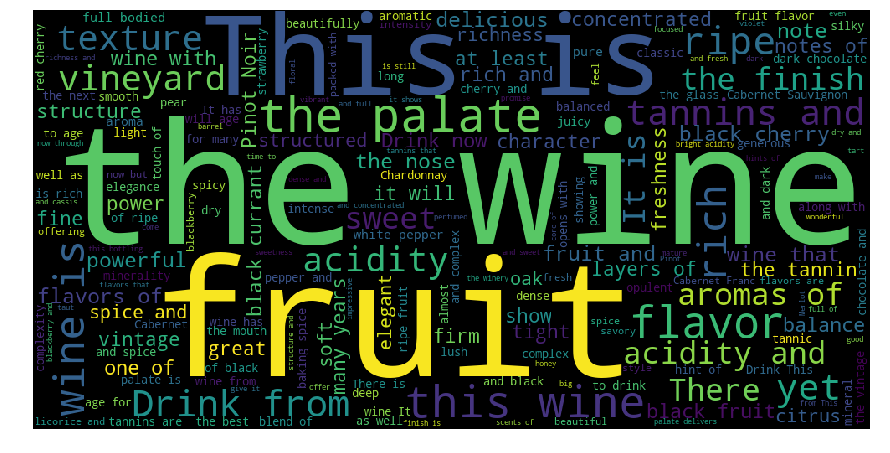

In [8]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(top.review_description))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

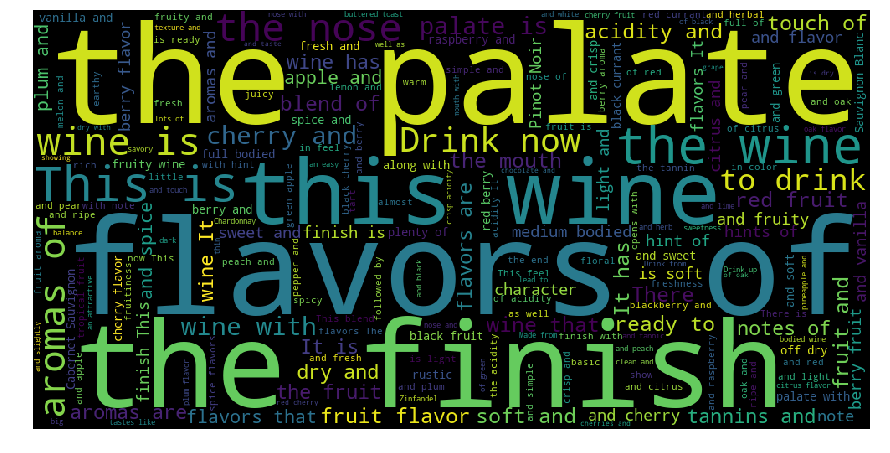

In [9]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(bottom.review_description))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Looking at the words that are mostly used in the reviews of the highest rated wines (>=95 points) 
and the lowest rated wines (<=85 points) the results are not very informative. If we exclude the basic common words 
(e.g. wine) or the neutral words (e.g. note), the 3 words that mostly appear in the 
higher rated wines are: fruit, tannin, rich, aroma, power. For the lower rated wines the words are: dry, sweet, light/simple, soft.

## Analyze wine from countries:

In [13]:
df3 = pd.DataFrame(df.groupby('country')['points','price'].mean())
df4 = pd.DataFrame(df.groupby('country')['review_description'].count())
country= df3.join(df4)

In [14]:
country.columns= ['Avg. Points', 'Avg. Price', 'Count of Wine']

In [30]:
country.sort_values(by ='Count of Wine')

,Avg. Points,Avg. Price,Count of Wine
country,,,
India,89.000000,12.000000,1
Czech Republic,86.333333,15.333333,3
Serbia,87.500000,31.500000,4
Switzerland,88.000000,107.800000,5
Luxembourg,88.400000,23.600000,5
Macedonia,86.000000,15.000000,5
Cyprus,87.166667,15.166667,6
Peru,82.625000,13.875000,8
Ukraine,83.454545,9.272727,11


We can infer that US provied us with the maximum number of wines.

## Analyze costly wines by Winery:

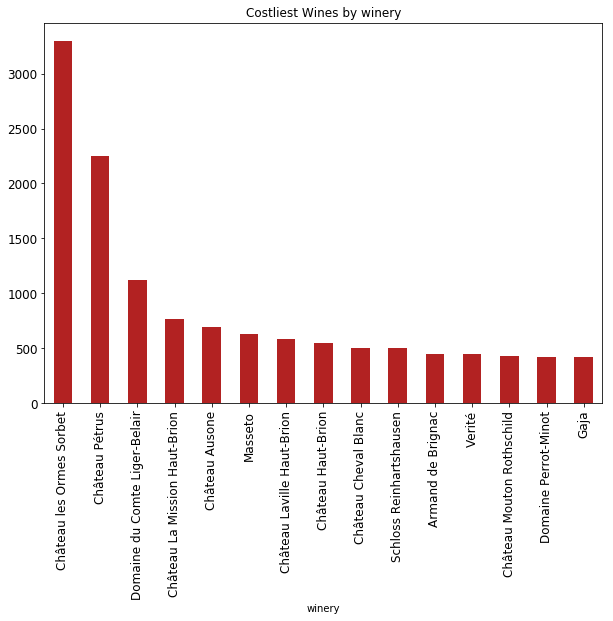

In [16]:
costly_vine = df.groupby('winery').price.median().nlargest(15)
costliest_wine = costly_vine.plot.bar(figsize=(10,7), fontsize=12, color='firebrick')
plt.title('Costliest Wines by winery')
plt.show()

The Chateau Ies Ormes Sorbet wineryy has the most costly wine.

## Analyze review distribution by taster user name:

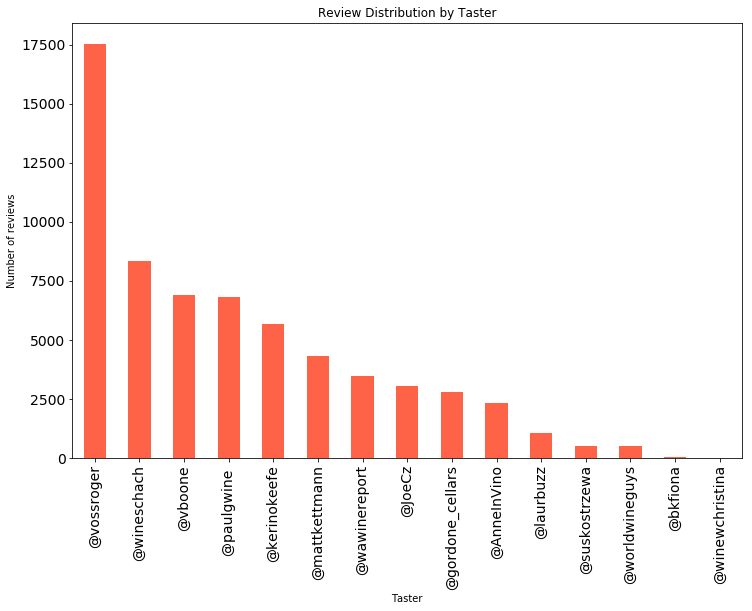

In [18]:
reviews_per_taster = df['user_name'].value_counts().plot.bar(title='Review Distribution by Taster', fontsize=14, figsize=(12,8), color='tomato');
plt.xlabel('Taster')
plt.ylabel('Number of reviews')
plt.show()

We can see from the above graph that taster with user name @vossroger has shared most number of reviews.

## Visualising Distribution Of Wines In Various Price Groups:

<Group 1 : 0 - 30> ; 
<Group 2 : 30 - 80> ;
<Group 3 : 80 - 150> ;
<Group 4 : 150 - 500> ;
<Group 5 : Above 500> ;

In [31]:
def price_group(pr):
    if(pr>0 and pr<30):
        return 1
    elif(pr >= 30 and pr < 80):
        return 2
    elif(pr >= 80 and pr < 150):
        return 3
    elif(pr >= 150 and pr < 500):
        return 4
    else:
        return 5

In [32]:
df['price'] = df['price'].apply(price_group)
counts = list(df['price'].value_counts())

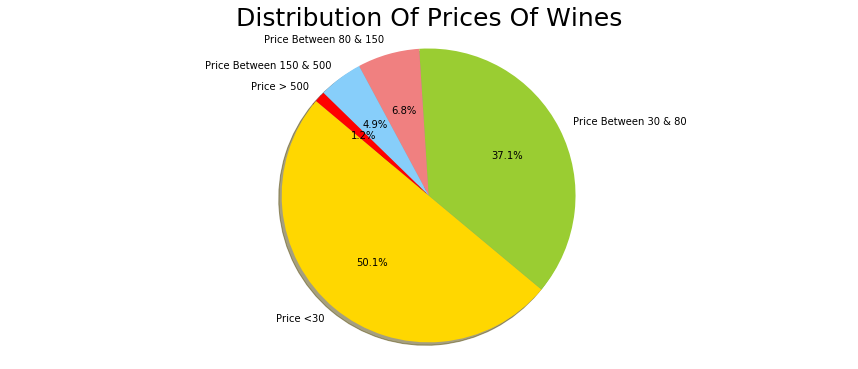

In [34]:
labels = ['Price <30','Price Between 30 & 80','Price Between 80 & 150','Price Between 150 & 500','Price > 500']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']
plt.figure(figsize = (15,6)) 
plt.pie(counts,labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Distribution Of Prices Of Wines",fontsize = 25)
plt.axis('equal')
plt.show()

We see hat most of the wines produced are in the price range of 0 to 30.

## Data Preprocessing:

In [35]:
df.isnull().sum()

user_name             19393
country                  35
review_title              0
review_description        0
designation           23647
points                    0
price                     0
province                 35
region_1              12754
region_2              46708
winery                    0
variety                   0
dtype: int64

In [36]:
df.dropna(inplace=True)

In [37]:
df.shape

(16079, 12)

In [38]:
df.drop(['user_name','review_title','designation','province','region_1','region_2','points','price','country','winery'], axis = 1, inplace = True)

## Cleaning the texts:

In [39]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []

for i in df.index:
    review = re.sub('[^a-zA-Z]', ' ', df['review_description'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [40]:
df.head()

,review_description,variety
6,"Half Syrah and half Cabernet Sauvignon, with 4...",Red Blend
7,"High-toned red fruit stars in this wine, a nic...",Zinfandel
8,"Displaying typical McMinnville AVA subtlety, t...",Pinot Noir
10,With an alluring bouquet of fresh-cut jasmine ...,Sauvignon Blanc
34,"Peach pit, apple and pear fruit flavors combin...",Chardonnay


## Creating the Bag of Words model:

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 4000)

X = cv.fit_transform(corpus).toarray()
y = df.iloc[:,-1].values

## Splitting the dataset into the Training set and Test set:

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Training the Logistic Regression model on the Training set:

In [43]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(n_jobs = -1)
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array(['Pinot Noir', 'Cabernet Sauvignon', 'Pinot Noir', ..., 'Red Blend',
       'Bordeaux-style Red Blend', 'Cabernet Sauvignon'], dtype=object)

## Accuracy of prediction results from the train dataset:

In [45]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_predict_test)
print('Logistic Regression:', acc * 100)


Logistic Regression: 70.77114427860697


# Test Dataset:

In [46]:
df1 = pd.read_csv('test.csv')
df1.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [47]:
df1.drop(['user_name','country','review_title','designation','points','price','province','region_1','region_2','winery'], axis = 1, inplace = True)

In [48]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 20665):
    review = re.sub('[^a-zA-Z]', ' ', df1['review_description'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to C:\Users\om
[nltk_data]     sehgal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 4000)
X_tests = cv.fit_transform(corpus).toarray()


## Predicting the Test set results:

In [50]:
y_predict_test = classifier.predict(X_tests)

In [51]:
y_predict_test

array(['Pinot Noir', 'Chardonnay', 'Syrah', ..., 'Chardonnay',
       'Chardonnay', 'Syrah'], dtype=object)

## Creating a csv file with the results and all features:

In [52]:
df2 = pd.read_csv('test.csv')

In [53]:
df2['Variety'] = y_predict_test
df2.to_csv('Predicted_Variety.csv')

In [54]:
df2.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,Variety
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Pinot Noir
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards,Chardonnay
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime,Syrah
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio,Red Blend
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole,Chardonnay
